<a href="https://colab.research.google.com/github/JOSEPHREDDY07/DeepLearning/blob/master/Nivv_Fashion_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals


# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)

2.2.0-rc3


In [0]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
#metadata
#dataset

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incompleteFQUCQK/fashion_mnist-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incompleteFQUCQK/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.0. Subsequent calls will reuse this data.


In [0]:
dataset

{'test': <DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>,
 'train': <DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}

In [0]:
train_dataset, test_dataset = dataset['train'], dataset['test']

In [0]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

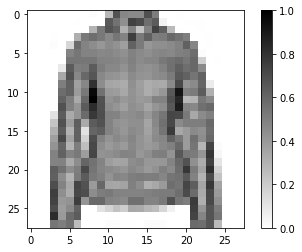

In [0]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Sequential

In [0]:
model = tf.keras.Sequential() 1000 X 1000 X 3 = 30,00,000

model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# FF NN 20 X 20 X 100 = 40,000
model.add(layers.Flatten())

model.add(layers.Dense(units=128, activation='relu'))

model.add(layers.Dense(units=10, activation = 'softmax'))

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [0]:
model.fit(train_dataset, epochs=20, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4748 - accuracy: 0.8241
Epoch 2/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2954 - accuracy: 0.8931
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2521 - accuracy: 0.9075
Epoch 4/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2225 - accuracy: 0.9163
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1958 - accuracy: 0.9265
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1767 - accuracy: 0.9333
Epoch 7/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1577 - accuracy: 0.9407
Epoch 8/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1422 - accuracy: 0.9470
Epoch 9/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1239 - accuracy: 0.9538
Epoch 10/20
1875/1875 [==============================] - 20s 11ms/step -

In [0]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.3857 - accuracy: 0.9093
Accuracy on test dataset: 0.9093000292778015


In [0]:
# takes one batch of images, 32
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [0]:
print(predictions.shape)
print(predictions[0])

(32, 10)
[8.41333349e-06 1.32291023e-09 3.51379672e-03 3.72751515e-07
 7.91042507e-01 5.20920196e-08 2.05434069e-01 1.03829376e-11
 7.50846880e-07 4.55722500e-08]


In [0]:
np.argmax(predictions[0])

4

In [0]:
test_labels[0]

4

In [0]:
class_names[np.argmax(predictions[0])]

'Coat'

In [0]:
print(test_labels)

[4 4 9 7 5 1 0 5 7 4 0 8 2 3 9 0 7 7 2 2 0 4 4 4 2 7 7 4 2 4 7 5]


In [0]:
pred = list(map(lambda x : np.argmax(x), predictions))
print(pred)

[4, 6, 9, 7, 5, 1, 0, 5, 7, 4, 0, 8, 2, 3, 9, 0, 7, 7, 6, 2, 0, 4, 4, 4, 0, 7, 7, 4, 2, 4, 7, 5]
